## 準備
### Google driveのマウント

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### rpy2のバージョン指定
2023/1時点で、次の"%load_ext rpy2.ipython"を正常に行うために必要な措置  

In [ ]:
!pip install rpy2==3.5.1
#!pip install --upgrade ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp39-cp39-linux_x86_64.whl size=317893 sha256=5ea042345ddce040651c71a199a1452966689f7581b9e01bde312e179be49974
  Stored in directory: /root/.cache/pip/wheels/09/e7/bc/33685b60ab54dba969596dd87244ee9f4c2e83dff9a53d4f20
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


### R言語の使用宣言

In [ ]:
%load_ext rpy2.ipython

### 必要パッケージのインストール

In [ ]:
%%R
install.packages("Rcpp")
install.packages("RcppArmadillo")
install.packages("doParallel")
install.packages('tidyverse')
install.packages('gsubfn')
install.packages('zoo')
install.packages('snow')
install.packages('plyr')
install.packages('gtools')
install.packages('ggsci')
install.packages('igraph')
install.packages('tidygraph')
install.packages('RColorBrewer')
#install.packages('scatterpie') <- エラーが出るのでコメントアウト
library("Rcpp")
library("RcppArmadillo")
library("doParallel")
library('tidyverse')
library('gsubfn')
library('zoo')
library('snow')
library('plyr')
library('gtools')
library('ggsci')
library('igraph')
library('tidygraph')
library('RColorBrewer')
#library('scatterpie')

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)



















	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)


































	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)














	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmpz476qO/downloaded_packages’





✔

### rELAパッケージをダウンロードしてインストール

In [ ]:
!cp drive/MyDrive/data/rELA.v0.20.tar.gz ./

In [ ]:
%%R
install.packages("./rELA.v0.20.tar.gz")
library("rELA")

(as ‘lib’ is unspecified)




## エネルギー地形解析  

### データのダウンロード

In [ ]:
%%R
#ocvecs <- as.matrix(read.csv('drive/MyDrive/data/ontario.occur.cur.csv', sep=',', fileEncoding='utf-8'))
#envecs <- as.matrix(read.csv('drive/MyDrive/data/ontario.env.csv', sep=',', fileEncoding='utf-8'))
baseabtable <- read.csv('drive/MyDrive/data/abundance_table.csv', sep=',', fileEncoding='utf-8') %>% 
  column_to_rownames(., var = "X")
basemetadata <- read.csv('drive/MyDrive/data/sample_metadata.csv', sep=',', fileEncoding='utf-8') %>% 
  column_to_rownames(., var = "X")

In [ ]:
%%R
head(baseabtable, 7)

         species.1 species.2 species.3 species.4 species.5 species.6 species.7
sample.1      2384         0      1313      8218         0      3529         0
sample.2     10343         0      2201      6814         0      2887         0
sample.3      4473         0       614      2046      4455      3429         0
sample.4      8786         0      5517       328         0        15         0
sample.5     10640         0      2321      6652         0      2642         0
sample.6         0         0       165      7794      1697      3816         0
sample.7      8801         0      2204      4853         0      5526         0
         species.8 species.9 species.10 species.11 species.12 species.13
sample.1         0      3938        120       4156          0       3223
sample.2      6944      4907          0          0          0          0
sample.3      1503      8319          0          0          0      10433
sample.4      5372     10032       1722          0          0       5001
sam

In [ ]:
%%R
head(basemetadata, 7)

         factor.1   factor.2
sample.1    -0.92 2.79692115
sample.2     0.34 2.14701252
sample.3    -0.92 1.60611363
sample.4    -0.24 0.58476465
sample.5     0.40 1.73161379
sample.6    -0.82 2.95971753
sample.7     0.36 0.07787331


In [ ]:
%%R
list[ocvecs, abvecs, envecs, samplelabel, specieslabel, factorlabel] <-
  Formatting(baseabtable, basemetadata, 0, c(0.05, 0.05, 0.95))

# 第4引数に, 採用するために少なくとも1サンプルで超えなくてはいけない閾値を入れる

Processed 256 samples.
Relative abundance threshold = 0.05 
Occurrence threshold (lower) = 0.05 
Occurrence threshold (upper) = 0.95 
Selected  16  out of  256 species.


### パラメータフィッティング

In [ ]:
%%R
#runSA: ocmatrix, env (environmental parameters; with>SA / without>fullSA), qth (threshold for stopping computation), rep (number of fitting processes to compute mean parameter value), threads (number of parallel threads)

sa <- runSA(data=as.matrix(ocvecs), qth=10^-5, rep=256, threads=1)
# 並列コアを止める？
# なぜ遅い？？

Start parameter fitting

Done ; elapsed time 41.43 sec



In [ ]:
%%R
list[he,je,ge,hge] <- sa2params(sa)

In [ ]:
%%R
he

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 2.4906684 -1.1985103  1.0707580  1.6787828 -1.2189255  0.6882397 -1.2394359 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
 0.2099769  2.7707413 -0.9573664 -2.6355274 -1.8634324  0.1107353  1.0041384 
species.15 species.16 
-1.3284623 -1.1544012 


In [ ]:
%%R
hge

 species.1  species.2  species.3  species.4  species.5  species.6  species.7 
 2.4906684 -1.1985103  1.0707580  1.6787828 -1.2189255  0.6882397 -1.2394359 
 species.8  species.9 species.10 species.11 species.12 species.13 species.14 
 0.2099769  2.7707413 -0.9573664 -2.6355274 -1.8634324  0.1107353  1.0041384 
species.15 species.16 
-1.3284623 -1.1544012 


In [ ]:
%%R
# transforming hhestp to hhest
#pd <- t(as.matrix(hhestp))
#rownames(pd) <- c(1)
#pd

NULL


### エネルギー地形の解析と可視化
#### ELA関数

In [ ]:
%%R
#sa2params(sa)
elanp <- ELA(sa, env=NULL,
                SS.itr=20000, FindingTip.itr=10000, # <- この2つはELA内のstable stateとtipping point探索のためのステップ数 (基本的に変更不要)
                threads=1, reporting=TRUE)
ela <- ELPruning(elanp, th=0.08)

Elapsed time 0.84 sec


In [ ]:
%%R
list[stablestates, stablen, tippingpoints, tippingen] <- ela[[1]]

安定状態

In [ ]:
%%R
stablestates

[1] 46468 38092 58001


安定状態の整数を2値ベクトルに変換

In [ ]:
%%R
# ssid -> 2値ベクトル
bin = as.list(sapply(stablestates, function(x){CIntegerDigits(x, length(colnames(ocvecs)))}))
bin

$dec2bin.ssid..n.
 [1] 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0

$dec2bin.ssid..n.
 [1] 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0

$dec2bin.ssid..n.
 [1] 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1



2値ベクトルを整数に戻す

In [ ]:
%%R
# 2値ベクトル -> ssid
as.vector(sapply(bin, function(x){str2i(paste(unlist(applyvec(x, as.character)), collapse=''))}))

[1] 46468 38092 58001


安定状態のID、energy、組成の一覧表示

In [ ]:
%%R
as.data.frame(cbind(stablestates, stablen, t(as.data.frame(bin)))) %>% 
  'colnames<-'(c('ID', 'Energy', colnames(ocvecs))) %>% 
  'rownames<-'(1: length(stablestates))

     ID    Energy species.1 species.2 species.3 species.4 species.5 species.6
1 46468 -14.12611         1         0         1         1         0         1
2 38092 -13.10762         1         0         0         1         0         1
3 58001 -11.95466         1         1         1         0         0         0
  species.7 species.8 species.9 species.10 species.11 species.12 species.13
1         0         1         1          0          0          0          0
2         0         0         1          1          0          0          1
3         1         0         1          0          0          1          0
  species.14 species.15 species.16
1          1          0          0
2          1          0          0
3          0          0          1


分水嶺の群集組成とエネルギー

In [ ]:
%%R
as.data.frame(tippingpoints)

   X1    X2    X3
1 Inf 38028 41857
2 Inf   Inf 58056
3 Inf   Inf   Inf


In [ ]:
%%R
as.data.frame(tippingen)

   X1        X2        X3
1 Inf -12.60345 -8.701035
2 Inf       Inf -7.588813
3 Inf       Inf       Inf


任意の群集組成のエネルギー



In [ ]:
%%R
# gは関数に含める？
x <- replace(rep(0,length(ocvecs[1,])),10,1)
cEnergy(x, he, je)

[1] 0.9573664


ある群集組成を含むベイシンの安定状態を求める

In [ ]:
%%R
# gは関数に含める？
x <- replace(rep(0,length(ocvecs[1,])),10,1)
Bi(x, he, je)

[[1]]
[1] 38092

[[2]]
[1] -13.10762



PCA # 観測された群集組成をPC1,2の平面にプロットしてベイシンで色分け

NULL


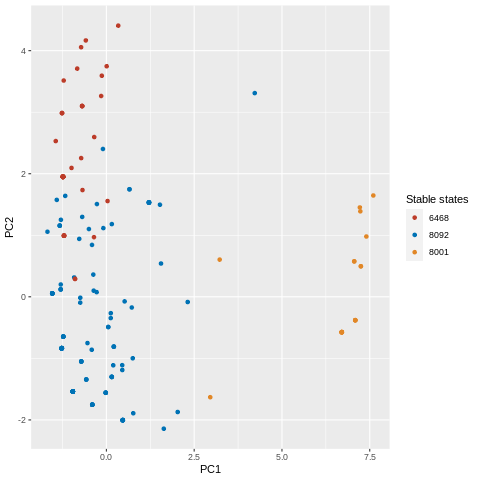

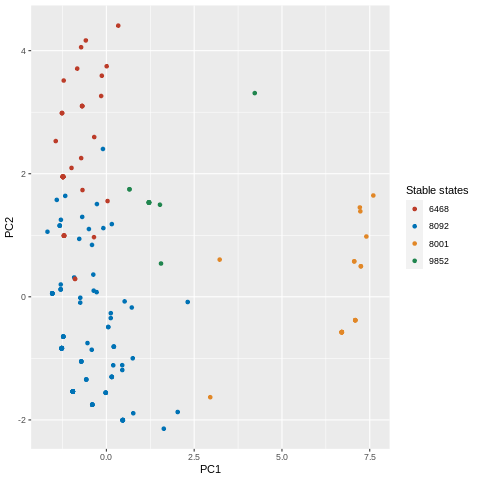

In [ ]:
%%R
PCplot(ocvecs, sa, ssrep=ela[[2]])
PCplot(ocvecs, sa, ssrep=ela[[2]], pruned=FALSE)

Disconnectivity graph


[1] 46468 38092 58001
NULL


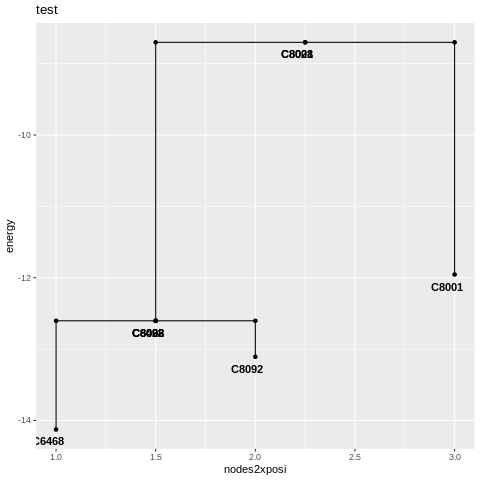

In [ ]:
%%R
showDG(ela[[1]], ocvecs, "test")

種間相互作用の表示

NULL


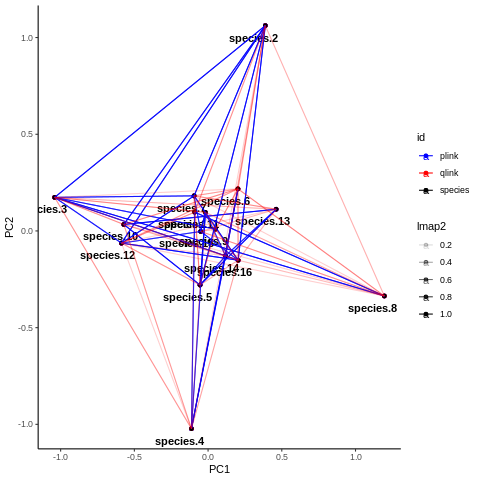

In [ ]:
%%R
showIntrGraph(ela[[1]], je, th=0.4, # <- 描くリンクの閾値
              annot_adj=c(0.75, 2.00))

### 環境勾配に沿ったエネルギー地形解析

In [ ]:
# 環境を含め再度パラメータ推定
%%R
sa <- runSA(data=as.matrix(ocvecs), env=as.matrix(envecs), qth=10^-5, rep=256, threads=1)

Start parameter fitting

Done ; elapsed time 48.79 sec



In [ ]:
%%R
colnames(envecs)

[1] "factor.1" "factor.2"


In [ ]:
%%R
gela <- GradELA(sa=sa, eid="factor.1", # 環境因子のラベルまたは位置を指定
  env=envecs, refenv=NULL, steps=32, prn=0.05, threads=1) #[[1]]: 各ステップのela戻り値, [[2]]: 変化させた環境因子の各ステップの値, [[3]]: 変化させた環境因子

refenv not specified, the mean of envecs is used
processing(32) |================================|
Elapsed time 22.53 sec


[1] 38092 58001 59852
NULL


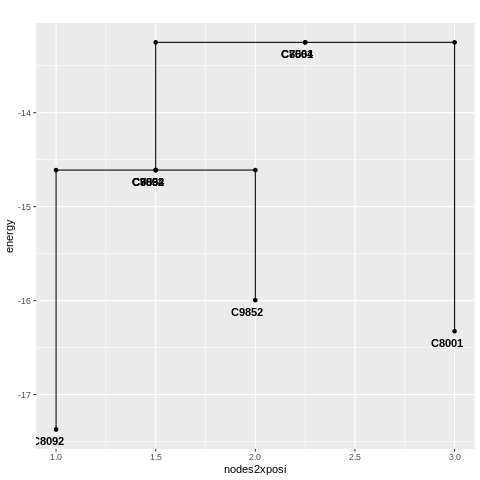

In [ ]:
#@title
%%R
showDG(gela[[1]][[1]][[1]], ocvecs)

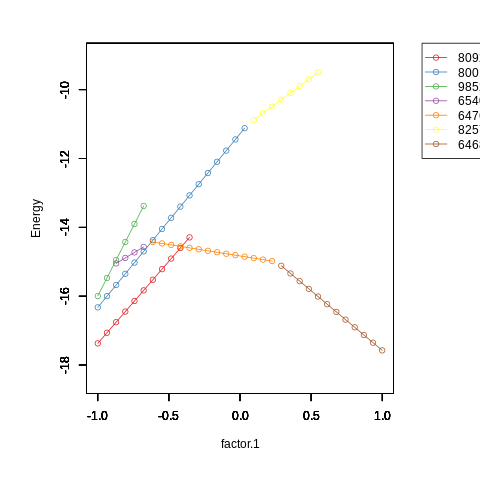

In [ ]:
#@title
%%R
# 安定状態ダイアグラムの表示
showSSD(gela)

SSentropy test

In [ ]:
%%R
stability(sa, unique(ocvecs))

           energy.gap  ssentropy
sample.1    8.9191205 0.00000000
sample.10   0.8875994 0.99604629
sample.100 10.0992523 0.00000000
sample.101  0.8749266 0.30315159
sample.102  2.2927642 0.21407107
sample.103  4.0115849 0.14144054
sample.104  0.0000000 0.42637613
sample.105  7.7644250 0.25138814
sample.106  0.4846605 0.00000000
sample.107  1.0485649 0.32346244
sample.108  1.9964081 0.00000000
sample.11   6.0988297 0.00000000
sample.110  0.1705866 0.00000000
sample.114  6.9029964 0.00000000
sample.119  5.2526765 0.00000000
sample.12   4.9811334 0.00000000
sample.121  6.6914917 0.00000000
sample.123  2.4417725 0.00000000
sample.124  3.3467629 0.50591924
sample.125  5.1066982 0.72985632
sample.126 11.2943454 0.00000000
sample.129  6.0055907 0.65998725
sample.132  6.9327141 0.53222852
sample.138  5.7031424 0.00000000
sample.139  2.7712172 0.08079314
sample.140  1.6297506 0.26034063
sample.143  9.2589826 0.00000000
sample.150  7.1143232 0.64613808
sample.152  3.1667874 0.02081407
sample.153